<a href="https://colab.research.google.com/github/surbhiagrawal22/rep0/blob/master/Bank_customer_churning_Classification_task_using_deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,LeakyReLU

Reading the Dataset and analysing basic details about dataset

In [130]:
pd.set_option("display.max_columns",None)

data_df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv")

print(data_df.head())
print(data_df.tail(5))
print(data_df.sample(5))


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [131]:
# checking for presence of any null values in dataset
print(data_df.info())
print(data_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

In [132]:
# for performing machin elearning, we are converting out categorical feature into dummy variable
encoder_geography=OneHotEncoder()
encoder_gender=OneHotEncoder()
new_geography= encoder_geography.fit_transform(data_df[["Geography"]]).toarray()
new_gender=encoder_gender.fit_transform(data_df[["Gender"]]).toarray()
data_df=data_df.join(pd.DataFrame(new_geography,columns=encoder_geography.categories_)  )
data_df=data_df.join(pd.DataFrame(new_gender,columns=encoder_gender.categories_)  )


In [133]:
print(data_df)
# dropping "Gender","Geography" columns from dataset 
data_df.drop(["Gender","Geography"],inplace=True,axis=1)

print(data_df["Exited"].value_counts()) # as we see the value counts for exited, the dataset is imbalanced
print(data_df.columns)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [134]:
# defining the response variable and independent varaibles
X=data_df.drop(["Exited","RowNumber",  "CustomerId" ,  "Surname"],axis=1)
y=data_df["Exited"]
print(X.head())
print(y.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  (France,)  (Germany,)  (Spain,)  \
0               1        101348.88        1.0         0.0       0.0   
1               1        112542.58        0.0         0.0       1.0   
2               0        113931.57        1.0         0.0       0.0   
3               0         93826.63        1.0         0.0       0.0   
4               1         79084.10        0.0         0.0       1.0   

   (Female,)  (Male,)  
0        1.0      0.0  
1        1.0      0.0  
2        1.0      0.0  
3        1.0      0.0  
4        1.0      0.0  
0    1
1    0
2    1

In [135]:
# performing train test split
state=6
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=state,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(8000, 13)
(2000, 13)
(8000,)
(2000,)
0    6370
1    1630
Name: Exited, dtype: int64
0    1593
1     407
Name: Exited, dtype: int64


In [136]:
# standardinse the data
standard=StandardScaler()
X_train=standard.fit_transform(X_train)
X_test=standard.fit_transform(X_test)

In [147]:
# defining Depp neyral leyaers to rpedict churning 

# Usage in a Keras layer:

model=Sequential()

initializer = tf.keras.initializers.HeNormal()
initializer_GlorotUniform = tf.keras.initializers.GlorotUniform()
initializer_Hey_uniform = tf.keras.initializers.HeUniform()

# creating first layer
model.add(Dense(units=10,kernel_initializer=initializer,input_dim=X_train.shape[1],activation="relu"))
# creating second hidden layer
model.add(Dense(units=15,kernel_initializer=initializer_Hey_uniform,activation="relu"))
model.add(Dense(units=25,kernel_initializer=initializer_Hey_uniform,activation="relu"))
# creating final output layer
model.add(Dense(1,kernel_initializer=initializer_GlorotUniform,activation="sigmoid"))

In [148]:
# prinitng the differnt model layers
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_34 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_35 (Dense)             (None, 25)                400       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 26        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
fitted_model=model.fit(X_train,y_train,verbose=1,epochs=20,batch_size=100,validation_split=.1)


Epoch 1/20
72/72 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7515 - val_loss: 0.5139 - val_accuracy: 0.7862
Epoch 2/20
72/72 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.7944 - val_loss: 0.4918 - val_accuracy: 0.7987
Epoch 3/20
72/72 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7968 - val_loss: 0.4889 - val_accuracy: 0.7875
Epoch 4/20
72/72 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8010 - val_loss: 0.4673 - val_accuracy: 0.7975
Epoch 5/20
72/72 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8079 - val_loss: 0.4571 - val_accuracy: 0.7925
Epoch 6/20
72/72 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8093 - val_loss: 0.4488 - val_accuracy: 0.8012
Epoch 7/20
72/72 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8144 - val_loss: 0.4378 - val_accuracy: 0.8025
Epoch 8/20
72/72 [==

[0.5594552159309387, 0.5055599808692932, 0.4825834631919861, 0.4625866413116455, 0.44596409797668457, 0.43450653553009033, 0.4242628216743469, 0.4147007167339325, 0.4056777358055115, 0.3969849646091461, 0.3878695070743561, 0.37887048721313477, 0.3714725375175476, 0.36508601903915405, 0.35971298813819885, 0.3549669682979584, 0.35161712765693665, 0.34885090589523315, 0.3459492623806, 0.3438231647014618]
[0.7515277862548828, 0.7944444417953491, 0.7968055605888367, 0.8009722232818604, 0.8079166412353516, 0.8093055486679077, 0.8144444227218628, 0.8191666603088379, 0.8227777481079102, 0.82791668176651, 0.8336111307144165, 0.8416666388511658, 0.8441666960716248, 0.8486111164093018, 0.851805567741394, 0.8538888692855835, 0.8569444417953491, 0.8570833206176758, 0.8608333468437195, 0.8627777695655823]
[0.5138522982597351, 0.49176475405693054, 0.48891791701316833, 0.46728843450546265, 0.45712581276893616, 0.44881048798561096, 0.4378172755241394, 0.42994439601898193, 0.41857802867889404, 0.4118188

<Figure size 1440x1440 with 0 Axes>

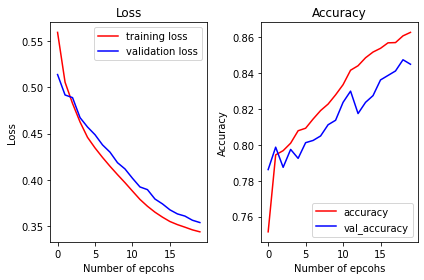

In [161]:
hist=fitted_model.history
# print(hist)
loss=hist["loss"]
accuracy=hist["accuracy"]
val_loss=hist["val_loss"]
val_accuracy=hist["val_accuracy"]
print(loss)
print(accuracy)
print(val_loss)
print(val_accuracy)
plt.figure(figsize=[20,20])
fig,ax=plt.subplots(1,2)
ax[0].plot(loss,label="training loss",color="red")
ax[0].plot(val_loss,label="validation loss",color="blue")
ax[0].legend()
ax[0].set_xlabel("Number of epcohs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss")
ax[1].plot(accuracy,label="accuracy",color="red")
ax[1].plot(val_accuracy,label="val_accuracy",color="blue")
ax[1].set_xlabel("Number of epcohs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [163]:
# predicting the values
pred=model.predict(X_test)
print(pred)
pred=(pred>.5)
print(pred)
 # buildign confustion matrix
confusion_matrix_= confusion_matrix(y_test,pred)
print(confusion_matrix_)

print(classification_report(y_test,pred))


[[0.0133996 ]
 [0.24125478]
 [0.03096652]
 ...
 [0.10152364]
 [0.03883988]
 [0.01867279]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[1521   72]
 [ 216  191]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.73      0.47      0.57       407

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



Trying differnet model with differnt parameters epochs, batch size, differnt layers and differnt kernel_initailiser

In [157]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=  6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer=  'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6458 - accuracy: 0.6686 - val_loss: 0.5592 - val_accuracy: 0.7690
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5161 - accuracy: 0.7959 - val_loss: 0.5129 - val_accuracy: 0.7883
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4883 - accuracy: 0.7988 - val_loss: 0.4906 - val_accuracy: 0.7906
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4731 - accuracy: 0.8001 - val_loss: 0.4764 - val_accuracy: 0.7914
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4623 - accuracy: 0.8003 - val_loss: 0.4659 - val_accuracy: 0.7921
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4541 - accuracy: 0.8013 - val_loss: 0.4576 - val_accuracy: 0.7948
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4474 - accuracy: 0.8029 - val_loss: 0.4510 - val_accuracy: 0.7963

[0.6457929015159607, 0.5161489248275757, 0.48831459879875183, 0.47305238246917725, 0.46228697896003723, 0.4540683925151825, 0.44743838906288147, 0.44194453954696655, 0.43721914291381836, 0.4331744313240051, 0.4295680820941925, 0.4263451099395752, 0.42345911264419556, 0.4205370843410492, 0.41740238666534424, 0.4141574501991272, 0.41076070070266724, 0.40753182768821716, 0.40444064140319824, 0.4011843800544739, 0.39793860912323, 0.39472508430480957, 0.391585111618042, 0.38863807916641235, 0.38578659296035767, 0.3829042613506317, 0.3801136314868927, 0.37768036127090454, 0.3753403425216675, 0.372882217168808, 0.3710445165634155, 0.36926403641700745, 0.3676932156085968, 0.366121768951416, 0.36495763063430786, 0.36375692486763, 0.36288148164749146, 0.36192357540130615, 0.36108332872390747, 0.36022576689720154, 0.3593842089176178, 0.358499139547348, 0.3577440679073334, 0.3569636046886444, 0.35627105832099915, 0.35544487833976746, 0.3548494279384613, 0.35399818420410156, 0.35326912999153137, 0.

<Figure size 1440x1440 with 0 Axes>

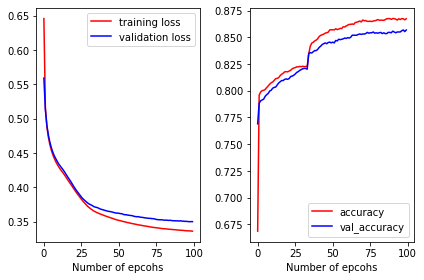

In [158]:
hist=model_history.history
# print(hist)
loss=hist["loss"]
accuracy=hist["accuracy"]
val_loss=hist["val_loss"]
val_accuracy=hist["val_accuracy"]
print(loss)
print(accuracy)
print(val_loss)
print(val_accuracy)
plt.figure(figsize=[20,20])
fig,ax=plt.subplots(1,2)
ax[0].plot(loss,label="training loss",color="red")
ax[0].plot(val_loss,label="validation loss",color="blue")
ax[0].legend()
ax[0].set_xlabel("Number of epcohs")
ax[1].plot(accuracy,label="accuracy",color="red")
ax[1].plot(val_accuracy,label="val_accuracy",color="blue")
ax[1].set_xlabel("Number of epcohs")
plt.legend()
plt.tight_layout()
plt.show()

In [164]:
# predicting the values
pred=classifier.predict(X_test)
print(pred)
pred=(pred>.5)
print(pred)
 # buildign confustion matrix
confusion_matrix_= confusion_matrix(y_test,pred)
print(confusion_matrix_)

print(classification_report(y_test,pred))

[[0.00701559]
 [0.29978997]
 [0.0177955 ]
 ...
 [0.084353  ]
 [0.00752565]
 [0.00143555]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[1524   69]
 [ 228  179]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.72      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Building a model with Dropout layer

In [165]:
# defining Depp neyral leyaers to rpedict churning 

# Usage in a Keras layer:

model_drop=Sequential()

initializer = tf.keras.initializers.HeNormal()
initializer_GlorotUniform = tf.keras.initializers.GlorotUniform()
initializer_Hey_uniform = tf.keras.initializers.HeUniform()

# creating first layer
model_drop.add(Dense(units=10,kernel_initializer=initializer,input_dim=X_train.shape[1],activation="relu"))
model_drop.add(Dropout(.2))
# creating second hidden layer
model_drop.add(Dense(units=15,kernel_initializer=initializer_Hey_uniform,activation="relu"))
model_drop.add(Dropout(.1))
# creating thired hidden layer
model_drop.add(Dense(units=25,kernel_initializer=initializer_Hey_uniform,activation="relu"))
model_drop.add(Dropout(.3))
# creating final output layer
model_drop.add(Dense(1,kernel_initializer=initializer_GlorotUniform,activation="sigmoid"))

In [166]:
model_drop.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
fitted_model_drop=model_drop.fit(X_train,y_train,verbose=1,epochs=20,batch_size=100,validation_split=.1)


Epoch 1/20
72/72 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.7342 - val_loss: 0.5446 - val_accuracy: 0.7975
Epoch 2/20
72/72 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.7765 - val_loss: 0.5156 - val_accuracy: 0.7975
Epoch 3/20
72/72 [==============================] - 0s 1ms/step - loss: 0.5405 - accuracy: 0.7881 - val_loss: 0.4954 - val_accuracy: 0.7975
Epoch 4/20
72/72 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.7949 - val_loss: 0.4806 - val_accuracy: 0.7975
Epoch 5/20
72/72 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7965 - val_loss: 0.4712 - val_accuracy: 0.7975
Epoch 6/20
72/72 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7969 - val_loss: 0.4606 - val_accuracy: 0.8000
Epoch 7/20
72/72 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7993 - val_loss: 0.4508 - val_accuracy: 0.8000
Epoch 8/20
72/72 [==

[0.6591492891311646, 0.5720769762992859, 0.5404650568962097, 0.5150587558746338, 0.5007810592651367, 0.48625701665878296, 0.4761866331100464, 0.4738765358924866, 0.4621947109699249, 0.4565514922142029, 0.4489287734031677, 0.4426247775554657, 0.4341557025909424, 0.4335085153579712, 0.4320589601993561, 0.4324113726615906, 0.4277244806289673, 0.42134812474250793, 0.41606763005256653, 0.4187781512737274]
[0.73416668176651, 0.7765277624130249, 0.7880555391311646, 0.7948611378669739, 0.7965278029441833, 0.7969444394111633, 0.7993055582046509, 0.8027777671813965, 0.8066666722297668, 0.8105555772781372, 0.8141666650772095, 0.8104166388511658, 0.8181944489479065, 0.8170833587646484, 0.8193055391311646, 0.8231944441795349, 0.8234722018241882, 0.8233333230018616, 0.8269444704055786, 0.8219444155693054]
[0.5445550680160522, 0.5156088471412659, 0.49535027146339417, 0.4806070327758789, 0.47120070457458496, 0.4605981409549713, 0.45080146193504333, 0.4445081651210785, 0.4372490346431732, 0.43077155947

<Figure size 1440x1440 with 0 Axes>

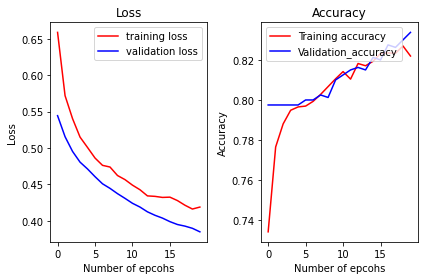

In [170]:
hist=fitted_model_drop.history
# print(hist)
loss=hist["loss"]
accuracy=hist["accuracy"]
val_loss=hist["val_loss"]
val_accuracy=hist["val_accuracy"]
print(loss)
print(accuracy)
print(val_loss)
print(val_accuracy)
plt.figure(figsize=[20,20])
fig,ax=plt.subplots(1,2)
ax[0].plot(loss,label="training loss",color="red")
ax[0].plot(val_loss,label="validation loss",color="blue")
ax[0].legend()
ax[0].set_xlabel("Number of epcohs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss")
ax[1].plot(accuracy,label="Training accuracy",color="red")
ax[1].plot(val_accuracy,label="Validation_accuracy",color="blue")
ax[1].set_xlabel("Number of epcohs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [172]:
# predicting the values
pred=model_drop.predict(X_test)
print(pred)
pred=(pred>.5)
print(pred)
 # buildign confustion matrix
confusion_matrix_= confusion_matrix(y_test,pred)
print(confusion_matrix_)

print(classification_report(y_test,pred))

[[0.04017556]
 [0.40188512]
 [0.02190962]
 ...
 [0.14457196]
 [0.07103437]
 [0.0715515 ]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[1566   27]
 [ 275  132]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1593
           1       0.83      0.32      0.47       407

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.69      2000
weighted avg       0.85      0.85      0.82      2000

